In [19]:
import pyvista as pv
import numpy as np
import pandas as pd
import os
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
malla = pv.read("ventriculos/p2/ventricle_Tagged.vtk")

## Conductividad:

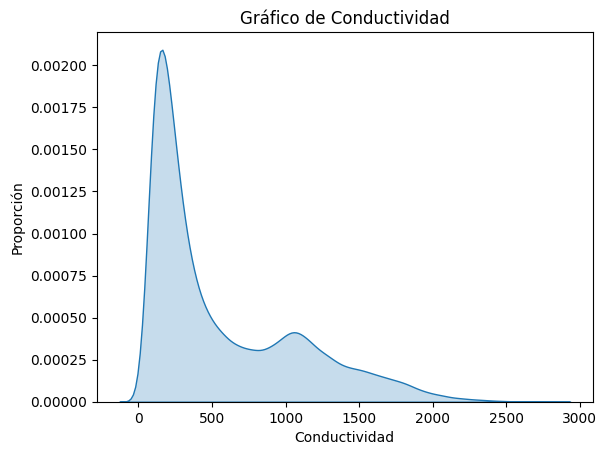

In [21]:

datos =malla["scalars"]
sns.kdeplot(datos, shade=True)

plt.title('Gráfico de Conductividad')
plt.xlabel('Conductividad')
plt.ylabel('Proporción')
plt.show()

## Endocardio - Epicardio

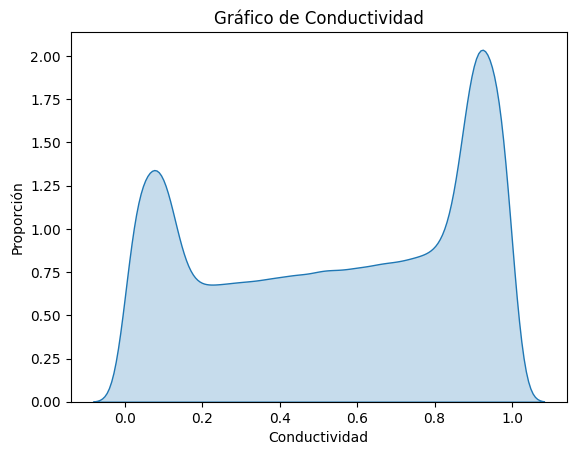

In [31]:
datos =malla["DistEndoToEpi"]
sns.kdeplot(datos, shade=True)

plt.title('Gráfico de Conductividad')
plt.xlabel('Conductividad')
plt.ylabel('Proporción')
plt.show()

In [26]:
df = pd.DataFrame(malla["EndoToEpi"], columns=["Valor"])
tabla_frecuencias = df["Valor"].value_counts().reset_index()
tabla_frecuencias.columns = ["Valor", "Frecuencia"]

print(tabla_frecuencias)

   Valor  Frecuencia
0    2.0      115807
1    1.0       67133
2    0.0       46055


## Tipo de célula

In [16]:
df = pd.DataFrame(malla["Cell_type"], columns=["Valor"])
tabla_frecuencias = df["Valor"].value_counts().reset_index()
tabla_frecuencias.columns = ["Valor", "Frecuencia"]

print(tabla_frecuencias)

   Valor  Frecuencia
0    0.0      178933
1    1.0       35895
2    2.0       14167


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


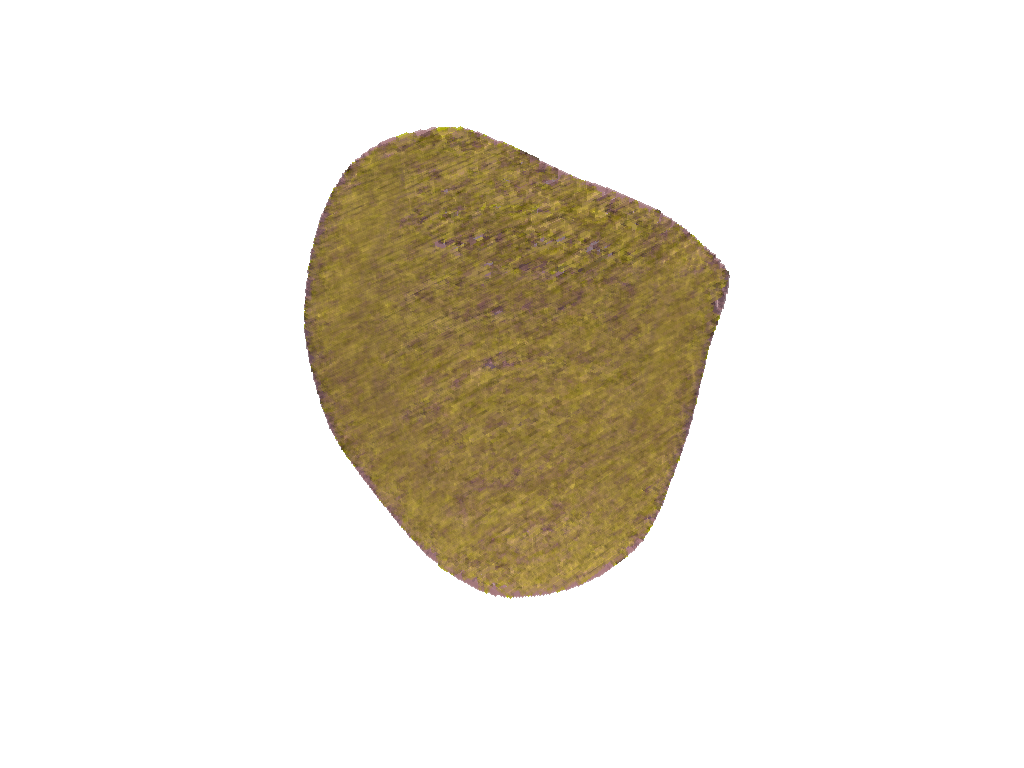

In [99]:
colores = ['pink', 'yellow', 'brown']

# Crear el plotter
plotter = pv.Plotter()

# Iterar sobre cada tipo de celda y agregarlas al plotter con su color correspondiente
for i, color in enumerate(colores):
    # Obtener las celdas de un tipo específico
    malla_tipo = malla.extract_cells(list(malla['Cell_type']==i))
    plotter.add_mesh(malla_tipo, color=color, opacity=0.5)

# Mostrar el plotter
plotter.show()

UnstructuredGrid (0x1eb70b087c0)
  N Cells:    156603
  N Points:   223878
  X Bounds:   1.452e+02, 2.259e+02
  Y Bounds:   -1.385e+02, -5.690e+01
  Z Bounds:   9.388e+01, 1.999e+02
  N Arrays:   14